In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
bigmart_train = pd.read_csv('Train_BM.csv')
bigmart_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
bigmart_test = pd.read_csv('Test_BM.csv')   
bigmart_test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


Let us merge the test and train for avoiding preproccessing again and again;
Also to help in cross validation by dividing the whole in train,validation and test set

EDA for data analysis on TRAIN dataset

In [4]:
bigmart_train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [5]:
bigmart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
#convert object to category as only few are unique
bigmart_train['Item_Identifier'] = bigmart_train['Item_Identifier'].astype('category')
bigmart_train['Item_Fat_Content'] = bigmart_train['Item_Fat_Content'].astype('category')
bigmart_train['Item_Type'] = bigmart_train['Item_Type'].astype('category')
bigmart_train['Outlet_Identifier'] = bigmart_train['Outlet_Identifier'].astype('category')
bigmart_train['Outlet_Size'] = bigmart_train['Outlet_Size'].astype('category')
bigmart_train['Outlet_Type'] = bigmart_train['Outlet_Type'].astype('category')
bigmart_train['Outlet_Location_Type'] = bigmart_train['Outlet_Location_Type'].astype('category')

Perform EDA on categorical features

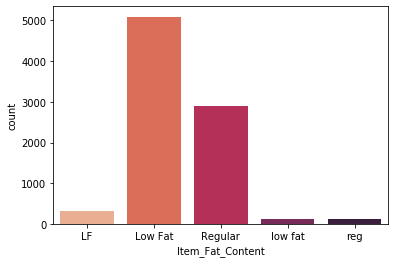

In [7]:
sns.countplot('Item_Fat_Content',data=bigmart_train,palette='rocket_r')
plt.show()#can be seen that LF+LowFat+low fat=LF and reg + Regular =reg 

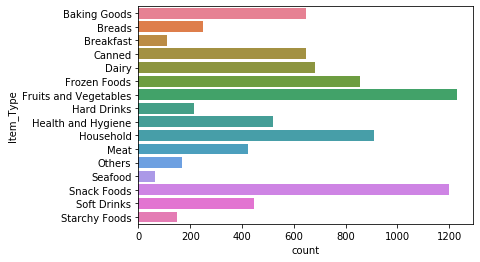

In [8]:
sns.countplot(y='Item_Type',data=bigmart_train,palette='husl')
plt.show()

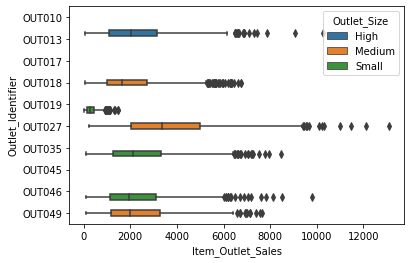

In [9]:
sns.boxplot(y='Outlet_Identifier',x='Item_Outlet_Sales',hue='Outlet_Size',data=bigmart_train)
plt.show()#seen that there sre some missing values in OutletSize

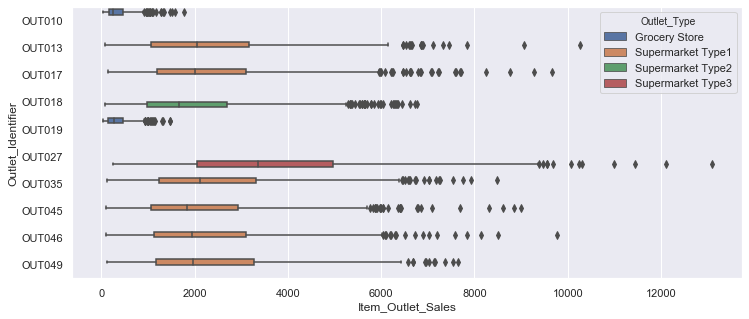

In [10]:
sns.set(rc={'figure.figsize':(12,5)})
sns.boxplot(y='Outlet_Identifier',x='Item_Outlet_Sales',hue='Outlet_Type',data=bigmart_train)
plt.show()

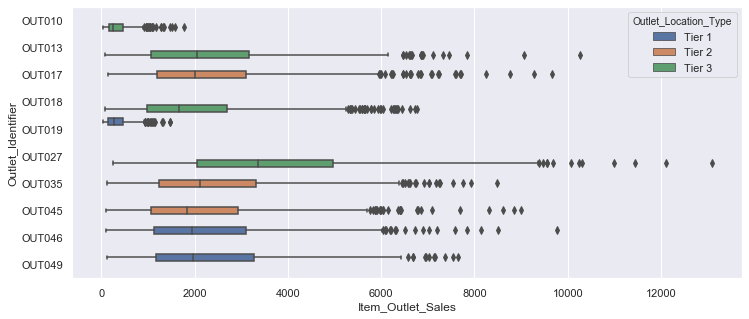

In [11]:
sns.set(rc={'figure.figsize':(12,5)})
sns.boxplot(y='Outlet_Identifier',x='Item_Outlet_Sales',hue='Outlet_Location_Type',data=bigmart_train)
plt.show() #no visible information as such

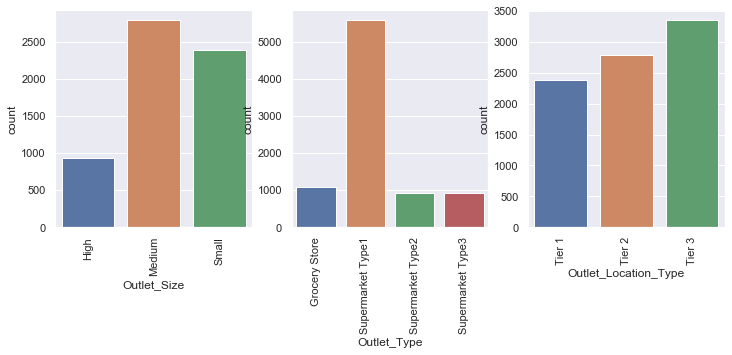

In [12]:
sns.set(rc={'figure.figsize':(12,4)})
fig,ax = plt.subplots(1,3)
sns.countplot('Outlet_Size',data=bigmart_train,ax=ax[0])
sns.countplot('Outlet_Type',data=bigmart_train,ax=ax[1])
sns.countplot('Outlet_Location_Type',data=bigmart_train,ax=ax[2])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.show()

In [13]:
merge_data = pd.concat([bigmart_train,bigmart_test],ignore_index=True,sort=True)
merge_data.tail(10)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
14194,reg,FDA01,59.5904,NaN,Canned,0.054463,15.00,1999,OUT049,Tier 1,Medium,Supermarket Type1
14195,Low Fat,NCH42,231.1010,NaN,Household,0.036594,6.86,1999,OUT049,Tier 1,Medium,Supermarket Type1
14196,Low Fat,FDF46,116.0834,NaN,Snack Foods,0.094053,7.07,2009,OUT018,Tier 3,Medium,Supermarket Type2
14197,Low Fat,DRL35,43.2770,NaN,Hard Drinks,0.030704,15.70,1997,OUT046,Tier 1,Small,Supermarket Type1
14198,Regular,FDW46,63.4484,NaN,Snack Foods,0.070411,13.00,1999,OUT049,Tier 1,Medium,Supermarket Type1
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.50,1997,OUT046,Tier 1,Small,Supermarket Type1
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.60,2009,OUT018,Tier 3,Medium,Supermarket Type2
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.00,2002,OUT045,Tier 2,NaN,Supermarket Type1
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.30,2007,OUT017,Tier 2,NaN,Supermarket Type1
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.50,2002,OUT045,Tier 2,NaN,Supermarket Type1


In [14]:
merge_data['Outlet_Size'].isnull().sum()

4016

In [15]:
merge_data['Item_Weight'].isnull().sum()

2439

C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


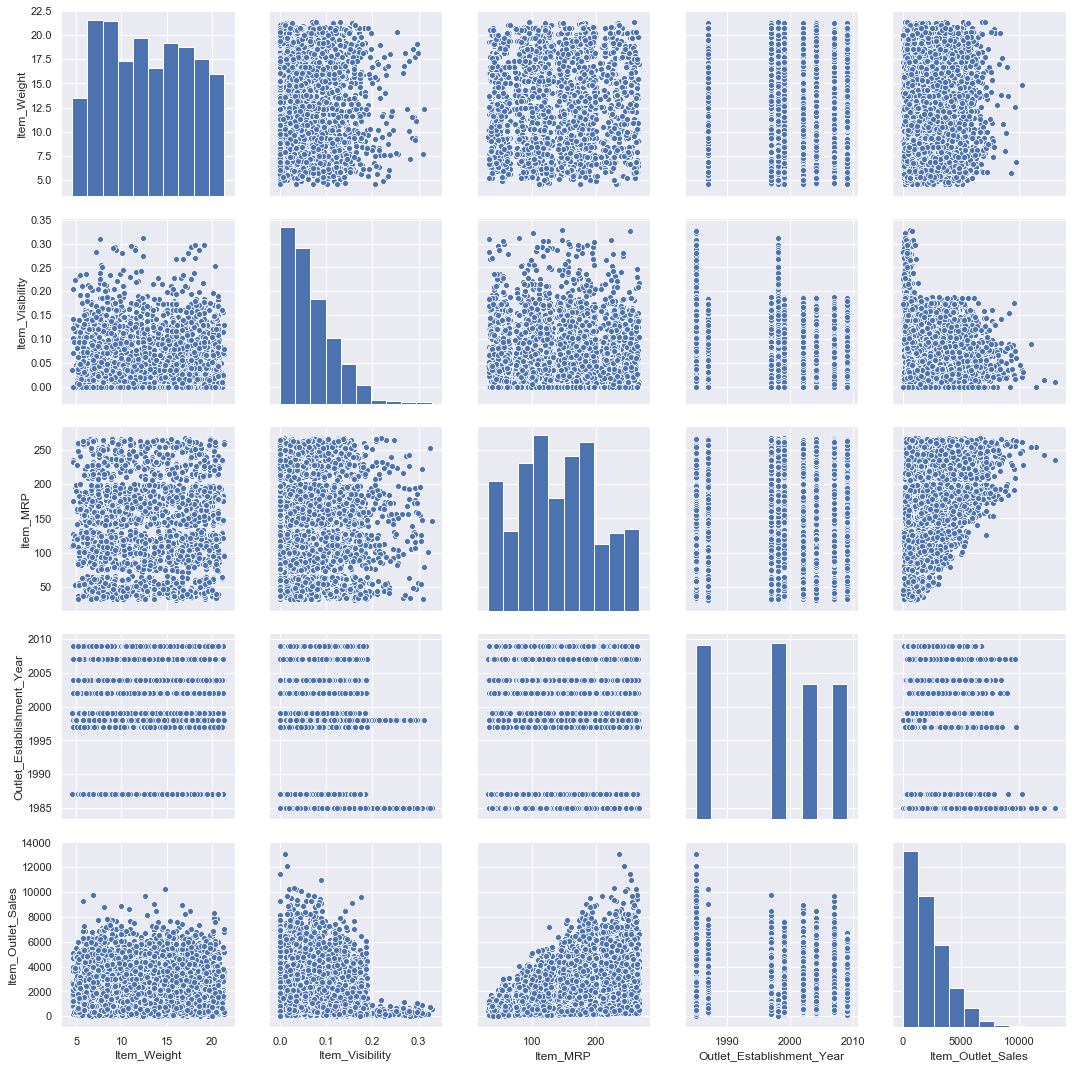

In [16]:
sns.pairplot(bigmart_train,height=3)

C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


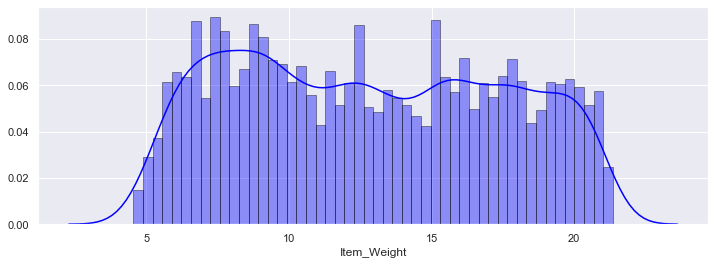

In [17]:
sns.distplot(merge_data['Item_Weight'],hist=True,color='blue',kde=True,bins=50,hist_kws={'edgecolor':'black'})
plt.show()

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [20]:
imputer = imputer.fit(merge_data[['Item_Weight']])
merge_data['Item_Weight'] = imputer.transform(merge_data[['Item_Weight']])

In [21]:
merge_data['Item_Weight'].isnull().sum()

0

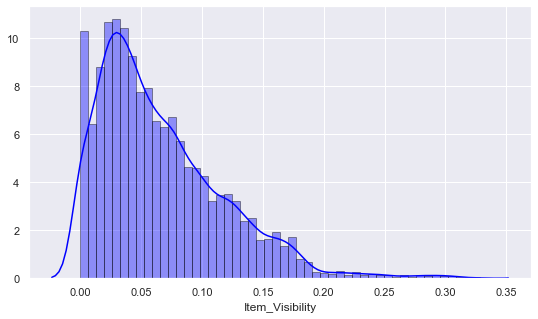

In [22]:
sns.set(rc={'figure.figsize':(9,5)})
sns.distplot(merge_data['Item_Visibility'],hist=True,color='blue',kde=True,bins=50,hist_kws={'edgecolor':'black'})
plt.show()

In [23]:
imputer2 = SimpleImputer(missing_values=0, strategy='median')
imputer2 = imputer2.fit(merge_data[['Item_Visibility']])
merge_data['Item_Visibility'] = imputer2.transform(merge_data[['Item_Visibility']])

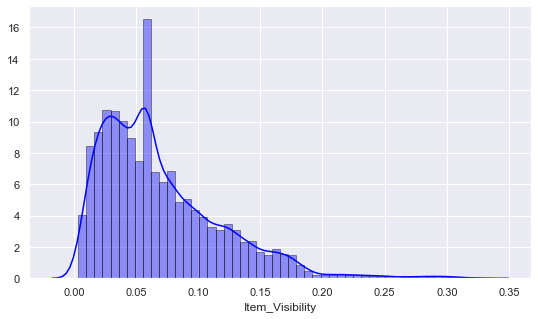

In [24]:
sns.set(rc={'figure.figsize':(9,5)})
sns.distplot(merge_data['Item_Visibility'],hist=True,color='blue',kde=True,bins=50,hist_kws={'edgecolor':'black'})
plt.show()

In [25]:
#combine lf and regular

In [26]:
merge_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [27]:
merge_data["Item_Fat_Content"].replace('low fat','Low Fat',inplace=True)
merge_data["Item_Fat_Content"].replace('LF','Low Fat',inplace=True)
merge_data["Item_Fat_Content"].replace('reg','Regular',inplace=True)
merge_data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [28]:
merge_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
for item in merge_data['Item_Identifier']:
    merge_data['Item_Identifier'].replace(item,item[:2],inplace=True)
merge_data['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [30]:
merge_data.loc[merge_data['Item_Identifier']=='NC','Item_Fat_Content'] = 'Non-edible'
#merge_data.loc[merge_data['Item_Identifier']=='NC']

In [31]:
merge_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'Non-edible'], dtype=object)

In [32]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

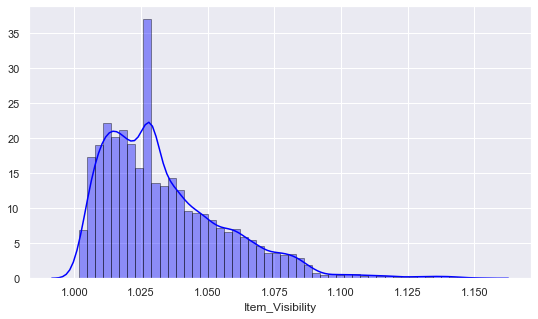

In [33]:
merge_data['Item_Visibility'] = np.sqrt(merge_data['Item_Visibility']+1)
#merge_data['Item_Visibility'] = normalize(merge_data['Item_Visibility'])

sns.set(rc={'figure.figsize':(9,5)})
sns.distplot(merge_data['Item_Visibility'],hist=True,color='blue',kde=True,bins=50,hist_kws={'edgecolor':'black'})
plt.show()

merge_data.Outlet_Size = merge_data.Outlet_Size.map({'High':3,'Medium':2,'Small':1})
merge_data.Outlet_Size.head(10)

In [34]:
from sklearn_pandas import CategoricalImputer

In [35]:
imp = CategoricalImputer()
merge_data['Outlet_Size'] = imp.fit_transform(merge_data['Outlet_Size'])
merge_data.Outlet_Size.head(10)

0    Medium
1    Medium
2    Medium
3    Medium
4      High
5    Medium
6      High
7    Medium
8    Medium
9    Medium
Name: Outlet_Size, dtype: object

In [36]:
merge_data['Age'] = 2013 - merge_data.Outlet_Establishment_Year

In [37]:
merge_data.Age.head()

0    14
1     4
2    14
3    15
4    26
Name: Age, dtype: int64

In [38]:
merge_data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Age
0,Low Fat,FD,249.8092,3735.1380,Dairy,1.007992,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
1,Regular,DR,48.2692,443.4228,Soft Drinks,1.009593,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,4
2,Low Fat,FD,141.6180,2097.2700,Meat,1.008345,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
3,Regular,FD,182.0950,732.3800,Fruits and Vegetables,1.028519,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,15
4,Non-edible,NC,53.8614,994.7052,Household,1.028519,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,26


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
labelencoder = LabelEncoder()
catcols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Outlet_Identifier','Item_Identifier']
for i in catcols:
    name = i + "_cat"
    merge_data[name] = labelencoder.fit_transform(merge_data[i])
merge_data.iloc[:,13:].head()

,Item_Fat_Content_cat,Outlet_Location_Type_cat,Outlet_Size_cat,Outlet_Type_cat,Item_Type_cat,Outlet_Identifier_cat,Item_Identifier_cat
0,0,0,1,1,4,9,1
1,2,2,1,2,14,3,0
2,0,0,1,1,10,9,1
3,2,2,1,0,6,0,1
4,1,2,0,1,9,1,2


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [42]:
cols = ['Item_MRP',
       'Item_Visibility', 'Item_Weight', 'Age', 'Item_Fat_Content_cat',
       'Outlet_Location_Type_cat', 'Outlet_Size_cat', 'Outlet_Type_cat',
       'Item_Type_cat', 'Outlet_Identifier_cat', 'Item_Identifier_cat']

In [43]:
test = merge_data[merge_data["Item_Outlet_Sales"].isnull()]
train = merge_data[merge_data["Item_Outlet_Sales"].notnull()]
test.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Age,Item_Fat_Content_cat,Outlet_Location_Type_cat,Outlet_Size_cat,Outlet_Type_cat,Item_Type_cat,Outlet_Identifier_cat,Item_Identifier_cat
8523,Low Fat,FD,107.8622,NaN,Snack Foods,1.003775,20.750,1999,OUT049,Tier 1,Medium,Supermarket Type1,14,0,0,1,1,13,9,1
8524,Regular,FD,87.3198,NaN,Dairy,1.019033,8.300,2007,OUT017,Tier 2,Medium,Supermarket Type1,6,2,1,1,1,4,2,1
8525,Non-edible,NC,241.7538,NaN,Others,1.048606,14.600,1998,OUT010,Tier 3,Medium,Grocery Store,15,1,2,1,0,11,0,2
8526,Low Fat,FD,155.0340,NaN,Snack Foods,1.007665,7.315,2007,OUT017,Tier 2,Medium,Supermarket Type1,6,0,1,1,1,13,2,1
8527,Regular,FD,234.2300,NaN,Dairy,1.057639,12.600,1985,OUT027,Tier 3,Medium,Supermarket Type3,28,2,2,1,3,4,5,1


In [44]:
cormat = merge_data.corr()

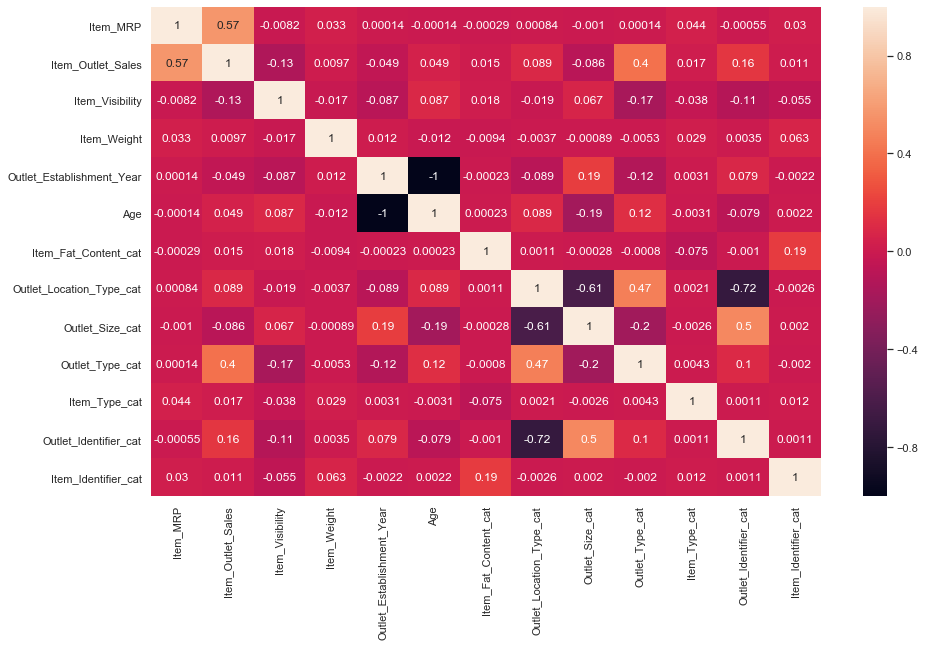

In [45]:
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(cormat,annot=True)
plt.show()

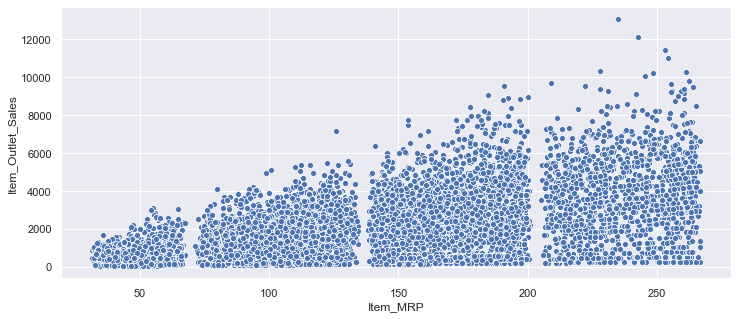

In [46]:
sns.set(rc={'figure.figsize':(12,5)})
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=merge_data)
plt.show()

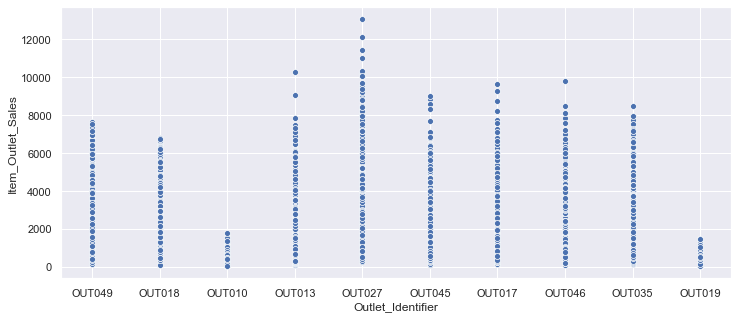

In [47]:
sns.set(rc={'figure.figsize':(12,5)})
sns.scatterplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=merge_data)
plt.show()

In [48]:
X = train.drop("Item_Outlet_Sales",axis=1) 
X = train[cols]
y = train['Item_Outlet_Sales']
y.isnull().any()

False

In [49]:
X_intermediate,X_test,y_intermediate,y_test = train_test_split(X,y,shuffle=True,test_size=0.2,random_state=42)

X_train,X_validation,y_train,y_validation = train_test_split(X_intermediate,y_intermediate,shuffle=False,test_size=0.2,random_state=42)

#proportions:
print("Training: {}%,\nValidation: {}%,\nTesting:{}%".format((len(y_train)/len(y)),(len(y_validation)/len(y)),(len(y_test)/len(y))))

Training: 0.6399155227032735%,
Validation: 0.1600375454652118%,
Testing:0.20004693183151473%


In [50]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [51]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
param = {'alpha':[0.0001,0.001,0.01,0.1,1,10,10]}

lasso = Lasso(max_iter=10000)
clf = GridSearchCV(lasso,param_grid=param,scoring='neg_mean_squared_error')
clf.fit(X,y)

C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [53]:
print("best param: {}\nbest score: {}".format(clf.best_params_,np.sqrt(-clf.best_score_)))

best param: {'alpha': 0.01}
best score: 1196.223832486257


In [54]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

K_Fold Validation

In [55]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR

In [56]:
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(X_scaled, y):
        
        # split data
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # instantiate model
        lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
        lasso.fit(X_train,y_train)
        #calculate error
        train_err = mean_squared_error(y_train,lasso.predict(X_train))
        val_err = mean_squared_error(y_val,lasso.predict(X_val))
        train_errors.append(train_err)
        validation_errors.append(val_err)
        
        print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
        format(alpha,np.sqrt(round(np.mean(train_errors),4)),np.sqrt(round(np.mean(validation_errors),4))))

NameError: name 'X_scaled' is not defined

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [77]:
from sklearn.linear_model import   SGDRegressor,  BayesianRidge,  LassoLars ,  ARDRegression ,  PassiveAggressiveRegressor ,  TheilSenRegressor,  LinearRegression

In [80]:
classifiers = [
    SVR(),
      SGDRegressor(),
      BayesianRidge(),
      LassoLars(),
      ARDRegression(),
      PassiveAggressiveRegressor(),
      TheilSenRegressor(),
      LinearRegression()]

In [85]:
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    print("Traing: ",(np.sqrt(mean_squared_error(y_train,clf.predict(X_train)))))
    print("Validation: ",(np.sqrt(mean_squared_error(y_validation,clf.predict(X_validation)))))
    print("Testing: ",(np.sqrt(mean_squared_error(y_test,clf.predict(X_test)))))
    print("--"*20)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Traing:  1762.3617019480296
Validation:  1780.5967993348281
Testing:  1675.071898748762
----------------------------------------
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
Traing:  1204.5453605993182
Validation:  1232.8961644026738
Testing:  1135.2578653548048
----------------------------------------
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
Traing:  1218.469015475897
Validation:  1244.259922539899
Testing:  1144.9938395028648
----------------------------------------
ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, threshold_lambda=